# The `analosis` package

**Author**: Natalie B. Hogg

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides the interface with the `analosis` package, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [1]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
Choose the cosmological parameters which will be used by `lenstronomy`, `astropy` and `colossus` (for halo mass functions). The `id` must match one of those known to `colossus`: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

### Scenario
Choose the scenario you want to analyse.

Options:
* `composite lens`
* `distributed haloes`

### Complexity
Set the model complexity: you can choose to fit the generated image with a perfect model, a perfect minimal model, or a variety of incomplete minimal models. **This choice is only relevant for the composite lens**. It will be ignored if you run the distributed haloes scenario.

Options:
* `perfect`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS`
* `perfect minimal`: fits the generated image with a model consisting of `main lens` + `halo`+ `LOS MINIMAL`
* `missing halo`: fits the generated image with a model consisting of `main lens` +  `LOS MINIMAL`
* `missing offset`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo centre fixed to zero
* `missing ellipticity`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo ellipticity fixed to zero

### Number of runs
Choose the number of runs you want to do i.e. how many images will be created and fit.

### Parameters
Other parameters.

In [2]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315, 'z_observer': 0.0, 'z_lens': 0.5, 'z_source': 2.0}

settings = {'scenario': 'composite lens',
            'complexity': 'perfect',
            'number_of_images': 4,
            'lens_model_list': ['LOS', 'SERSIC_ELLIPSE_POTENTIAL', 'NFW_ELLIPSE'],
            'n_burn': 1,
            'n_run': 1}

parameters = {'maximum_shear': 0.03}

### Run
Finally, run the analysis. Note that you don't need to specify a path where you want your results to be saved: `analosis` automatically saves everything to a dedicated results directory. **Please don't push the contents of this directory to github!** (There is a .gitignore in place to prevent this, so you shouldn't have to worry about doing it accidentally).

In [3]:
result = Run(cosmology, settings, parameters)

Running the composite lens case with the following settings:

Model: perfect
Number of runs: 4
Adding LOS to the main lens.
Adding LOS to the main lens.
Adding LOS to the main lens.
Adding LOS to the main lens.

Analysis complete and results saved at /home/natalie/Documents/Projects/los_effects/analosis/analosis/results.


../../analosis/analysis/plots.py:51: RuntimeWarning: invalid value encountered in log10
  im = a.matshow(np.log10(image_list[i]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


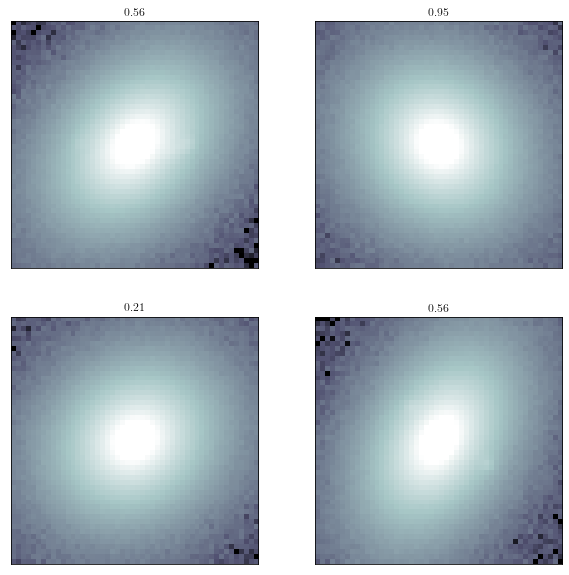

In [8]:
from analosis.analysis.plots import Plots

p = Plots()

path = result.pathfinder()

p.image_plot(path, settings['number_of_images'])